https://stats.stackexchange.com/questions/315698/is-there-an-equivalent-to-fourier-decomposition-using-normal-distributions-inste/315707#315707
>I need to create a desired light pattern (car front light) from a large number of normal distributions (small LEDs, maybe different size). One approach would be to use an evolutionary algorithm, but I was wondering if there is a smarter mathematical approach to this.
Is there a way to decompose a desired pattern, say for a start a 1d box function, to a list of 1d normal distributions with different sigmas. This might work similar to Fourier, maybe with the approach to use as less normal distributions as possible, so it will not use a infinite number of very small, narrow normal distributions and place them side by side. 
Any ideas how to solve this?

In [24]:
library(flexmix)
set.seed(42)

m1 <- 10
m2 <- 22

sd1 <- 5
sd2 <- 3

N1 <- 1000
N2 <- 5000

D <- c(rnorm(mean = m1, sd = sd1, n = N1), rnorm(mean = m2, sd = sd2, n = N2))

kde <- density(D)

mix1 <- FLXMRglm(family = "gaussian")
mix2 <- FLXMRglm(family = "gaussian")
fit <- flexmix(D ~ 1, data = as.data.frame(D), k = 2, model = list(mix1, mix2))

component1 <- parameters(fit, component=1)[[1]]
component2 <- parameters(fit, component=2)[[1]]

m1.estimated <- component1[1]
sd1.estimated <- component1[2]

m2.estimated <- component2[1]
sd2.estimated <- component2[2]

weights <- table(clusters(fit))


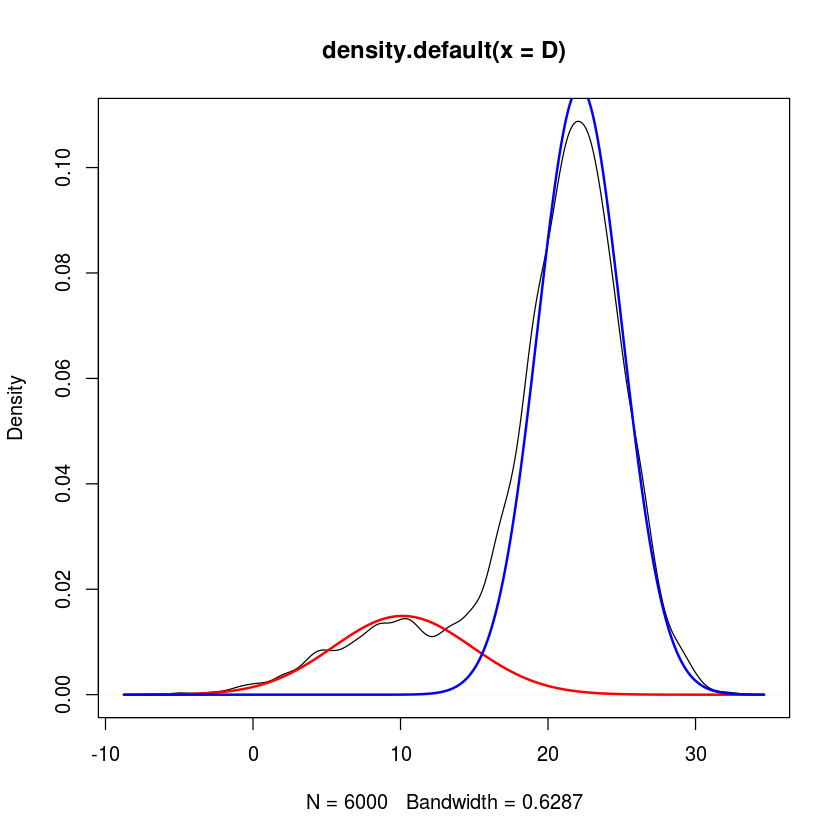

In [52]:
plot(kde)
lines(kde$x, (weights[1]/sum(weights)*dnorm(mean = m1.estimated, sd = sd1.estimated, x = kde$x)), col = "red", lwd = 2)
lines(kde$x, (weights[2]/sum(weights)*dnorm(mean = m2.estimated, sd = sd2.estimated, x = kde$x)), col = "blue", lwd = 2)
